In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
nba = pd.read_csv('/Users/julianlagier/Desktop/python projects/NBA/ASA All NBA Raw Data (1).csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

/var/folders/sj/h_8kf28d2rq7qktxyzgh2hd00000gn/T/ipykernel_17089/3475434401.py:10: DtypeWarning: Columns (68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  nba = pd.read_csv('/Users/julianlagier/Desktop/python projects/NBA/ASA All NBA Raw Data (1).csv')


In [3]:
#turn date into datetime object
nba['game_date'] = pd.to_datetime(nba['game_date'])

In [4]:
display(nba.dtypes, nba.info(),nba.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121107 entries, 0 to 121106
Data columns (total 81 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   game_id                            121107 non-null  object        
 1   game_date                          121107 non-null  datetime64[ns]
 2   OT                                 121107 non-null  int64         
 3   H_A                                121107 non-null  object        
 4   Team_Abbrev                        121107 non-null  object        
 5   Team_Score                         121107 non-null  int64         
 6   Team_pace                          121107 non-null  float64       
 7   Team_efg_pct                       121107 non-null  float64       
 8   Team_tov_pct                       121107 non-null  float64       
 9   Team_orb_pct                       121107 non-null  float64       
 10  Team_ft_rate        

game_id                                      object
game_date                            datetime64[ns]
OT                                            int64
H_A                                          object
Team_Abbrev                                  object
Team_Score                                    int64
Team_pace                                   float64
Team_efg_pct                                float64
Team_tov_pct                                float64
Team_orb_pct                                float64
Team_ft_rate                                float64
Team_off_rtg                                float64
Inactives                                    object
Opponent_Abbrev                              object
Opponent_Score                                int64
Opponent_pace                               float64
Opponent_efg_pct                            float64
Opponent_tov_pct                            float64
Opponent_orb_pct                            float64
Opponent_ft_

None

Index(['game_id', 'game_date', 'OT', 'H_A', 'Team_Abbrev', 'Team_Score',
       'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct',
       'Team_ft_rate', 'Team_off_rtg', 'Inactives', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct',
       'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player', 'player_id', 'starter', 'mp', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP',
       'SDP', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'ts', 'last_60_minutes_per_game_s

In [5]:
#.loc playoffs finals to see if playoffs are included in the data
nba[nba['game_date']=='2021-07-20'].drop_duplicates(subset='game_id', keep = 'first')

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,player,player_id,starter,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,did_not_play,is_inactive,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,bpm,season,minutes,double_double,triple_double,DKP,FDP,SDP,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes
54833,202107200MIL,2021-07-20,0,H,MIL,105,100.1,0.488,16.0,26.2,0.305,104.9,"Thanasis Antetokounmpo, Donte DiVincenzo",PHO,98,100.1,0.477,12.9,12.5,0.186,97.9,Jrue Holiday,holidjr01,1,46:17,4,19,0.211,2,7,0.286,2,2,1.0,1,8,9,11,4,0,3,1,12,12,0,0,0.302,0.263,0.368,0.105,2.5,17.3,10.4,34.7,4.1,0.0,13.1,21.0,82,95,0.5,2021,46.283333,1,0,48.75,48.3,51.25,1.053295,1.043572,1.10731,0.021606,19.88,39.339394,19.275585,85.0,15.0,0.0,0.0,0.0,187.985082


In [6]:
#slice data to only get team stats and drop dups
team_data = nba[nba.columns.to_list()[:21]].loc[:].drop_duplicates(subset='game_id', keep = 'first')

In [7]:
team_data = team_data.reset_index(drop=True)

In [8]:
set(team_data['Team_Abbrev'].tolist())

{'ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS'}

In [9]:
#Create Total Score
team_data['Total_Score'] = team_data['Team_Score'] + team_data['Opponent_Score']
#Create string with team names
for i in range(0, len(team_data)):
    team_data.loc[i,'Matchup'] = str(team_data['Team_Abbrev'].loc[i])+' vs '+str(team_data['Opponent_Abbrev'].loc[i])

In [10]:
team_data

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup
0,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,260,IND vs BRK
1,202204100CHO,2022-04-10,0,A,WAS,108,97.7,0.489,8.7,31.5,0.170,110.5,"Bradley Beal, Thomas Bryant, Kentavious Caldwe...",CHO,124,97.7,0.640,15.2,29.7,0.112,126.9,232,WAS vs CHO
2,202204100CLE,2022-04-10,0,A,MIL,115,101.9,0.511,10.5,17.4,0.284,112.9,"Grayson Allen, Giannis Antetokounmpo, George H...",CLE,133,101.9,0.644,9.0,23.3,0.128,130.5,248,MIL vs CLE
3,202204100DAL,2022-04-10,0,A,SAS,120,98.4,0.545,7.5,17.5,0.258,121.9,"Doug McDermott, D. J. Stewart Jr., Lonnie Walk...",DAL,130,98.4,0.659,14.4,26.3,0.212,132.1,250,SAS vs DAL
4,202204100DEN,2022-04-10,1,A,LAL,146,102.7,0.553,10.2,27.7,0.447,128.7,"Carmelo Anthony, Anthony Davis, LeBron James, ...",DEN,141,102.7,0.565,10.8,22.9,0.280,124.3,287,LAL vs DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,202001080GSW,2020-01-08,0,A,MIL,107,101.4,0.454,8.2,11.1,0.322,105.5,"Dragan Bender, George Hill, Frank Mason, Camer...",GSW,98,101.4,0.466,15.8,22.2,0.195,96.7,205,MIL vs GSW
3540,202008020HOU,2020-08-02,0,A,MIL,116,105.4,0.538,17.7,36.2,0.185,110.0,"Eric Bledsoe, Pat Connaughton, Frank Mason",HOU,120,105.4,0.511,7.9,11.1,0.297,113.8,236,MIL vs HOU
3541,201911060HOU,2019-11-06,0,H,HOU,129,101.6,0.603,10.2,23.9,0.124,127.0,"Gary Clark, Eric Gordon, Gerald Green, Isaiah ...",GSW,112,101.6,0.464,8.5,29.1,0.240,110.2,241,HOU vs GSW
3542,201912250GSW,2019-12-25,0,A,HOU,104,102.1,0.450,10.1,24.6,0.140,101.8,"Eric Gordon, Gerald Green, Nenê Hilario, Thabo...",GSW,116,102.1,0.523,13.9,23.9,0.287,113.6,220,HOU vs GSW


In [11]:
#get list of teams for loop
team_list = set(team_data['Team_Abbrev'])
#get gsw as a test
gsw = team_data[(team_data['Team_Abbrev']=='GSW')|(team_data['Opponent_Abbrev']=='GSW')].loc[:]
gsw.reset_index(inplace=True)

In [12]:
#games were curry wasn't on the team
gsw[['Team_Score','Opponent_Score']][gsw['Inactives'].str.contains('Stephen Curry')].mean()

#games were curry was on the team
gsw[['Team_Score','Opponent_Score']][~gsw['Inactives'].str.contains('Stephen Curry')].mean()

Team_Score        112.955665
Opponent_Score    108.280788
dtype: float64

In [13]:
for i in range(0, len(gsw)):
    if 'GSW' in gsw.loc[i]['game_id']:
        gsw.loc[i,'Local'] = 1
    else:
        gsw.loc[i,'Local'] = 0
        

In [14]:
#not all games are labeled the same....
gsw[gsw['Team_Abbrev']=='GSW']['Local']==1
gsw[gsw['Opponent_Abbrev']=='GSW']['Local']==0

1       True
2      False
3       True
4      False
5      False
6       True
7      False
8       True
9      False
10      True
11     False
12     False
13      True
14      True
15      True
16     False
17      True
18     False
156     True
157     True
158    False
159    False
160    False
161    False
162    False
163     True
164    False
165     True
166    False
167    False
168     True
169    False
170     True
171    False
172    False
173     True
174    False
175     True
176     True
177    False
178     True
179     True
180     True
181    False
182     True
183     True
184    False
185    False
186     True
187     True
188    False
189     True
190    False
191     True
192    False
193    False
194    False
195    False
196     True
197     True
198     True
199    False
200    False
201     True
202     True
203    False
204    False
205     True
206    False
207    False
208     True
209     True
210    False
211     True
212    False
213    False
214     True

In [15]:
gsw.head()

,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local
0,9,202204100NOP,2022-04-10,0,A,GSW,128,94.6,0.722,16.4,22.6,0.136,135.3,"Chris Chiozza, Stephen Curry, Andre Iguodala, ...",NOP,107,94.6,0.495,9.5,34.6,0.091,113.1,235,GSW vs NOP,0.0
1,17,202204030SAC,2022-04-03,0,H,SAC,90,93.9,0.426,11.6,13.0,0.259,95.9,"Terence Davis, De'Aaron Fox, Richaun Holmes, D...",GSW,109,93.9,0.620,14.9,19.4,0.139,116.1,199,SAC vs GSW,0.0
2,41,202202030GSW,2022-02-03,0,A,SAC,114,95.8,0.594,14.3,13.9,0.238,119.0,"Marvin Bagley III, Terence Davis, ""DeAaron Fox""",GSW,126,95.8,0.679,14.1,31.0,0.143,131.5,240,SAC vs GSW,1.0
3,44,202110240SAC,2021-10-24,0,H,SAC,107,97.4,0.576,17.2,25.6,0.093,109.8,"Louis King, Neemias Queta",GSW,119,97.4,0.510,5.3,27.5,0.206,122.1,226,SAC vs GSW,0.0
4,92,202112200GSW,2021-12-20,0,A,SAC,98,98.6,0.524,17.4,15.8,0.133,99.4,"Marvin Bagley III, Terence Davis, De'Aaron Fox...",GSW,113,98.6,0.608,14.8,24.4,0.068,114.6,211,SAC vs GSW,1.0


In [16]:
#loop to add victories to the df
for i in range(0,len(gsw)):
    if gsw['Team_Abbrev'][i]=='GSW' and gsw['Team_Score'].loc[i]>gsw['Opponent_Score'].loc[i]:
        gsw.loc[i,'Victory']=1
    if gsw['Opponent_Abbrev'][i]=='GSW' and gsw['Team_Score'].loc[i]<gsw['Opponent_Score'].loc[i]:
        gsw.loc[i,'Victory']=1
    if gsw['Team_Abbrev'][i]=='GSW' and gsw['Team_Score'].loc[i]<gsw['Opponent_Score'].loc[i]:
        gsw.loc[i,'Victory']=0
    if gsw['Opponent_Abbrev'][i]=='GSW' and gsw['Team_Score'].loc[i]>gsw['Opponent_Score'].loc[i]:
        gsw.loc[i,'Victory']=0


In [17]:
#add another columns with team's and opponent's actual score
for i in range(0, len(gsw)):
    if gsw['Team_Abbrev'][i]=='GSW':
        gsw.loc[i,'gsw_score'] = gsw['Team_Score'].loc[i]
        gsw.loc[i,'Opp_score'] = gsw['Opponent_Score'].loc[i]
    if gsw['Opponent_Abbrev'][i]=='GSW':
        gsw.loc[i,'gsw_score'] = gsw['Opponent_Score'].loc[i]
        gsw.loc[i,'Opp_score'] = gsw['Team_Score'].loc[i]


In [18]:
#Create string with team matchups
for i in range(0, len(gsw)):
    gsw.loc[i,'Matchup'] = str(gsw['Team_Abbrev'].loc[i])+' vs '+str(gsw['Opponent_Abbrev'].loc[i])

In [19]:
gsw.head()

,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local,Victory,gsw_score,Opp_score
0,9,202204100NOP,2022-04-10,0,A,GSW,128,94.6,0.722,16.4,22.6,0.136,135.3,"Chris Chiozza, Stephen Curry, Andre Iguodala, ...",NOP,107,94.6,0.495,9.5,34.6,0.091,113.1,235,GSW vs NOP,0.0,1.0,128.0,107.0
1,17,202204030SAC,2022-04-03,0,H,SAC,90,93.9,0.426,11.6,13.0,0.259,95.9,"Terence Davis, De'Aaron Fox, Richaun Holmes, D...",GSW,109,93.9,0.620,14.9,19.4,0.139,116.1,199,SAC vs GSW,0.0,1.0,109.0,90.0
2,41,202202030GSW,2022-02-03,0,A,SAC,114,95.8,0.594,14.3,13.9,0.238,119.0,"Marvin Bagley III, Terence Davis, ""DeAaron Fox""",GSW,126,95.8,0.679,14.1,31.0,0.143,131.5,240,SAC vs GSW,1.0,1.0,126.0,114.0
3,44,202110240SAC,2021-10-24,0,H,SAC,107,97.4,0.576,17.2,25.6,0.093,109.8,"Louis King, Neemias Queta",GSW,119,97.4,0.510,5.3,27.5,0.206,122.1,226,SAC vs GSW,0.0,1.0,119.0,107.0
4,92,202112200GSW,2021-12-20,0,A,SAC,98,98.6,0.524,17.4,15.8,0.133,99.4,"Marvin Bagley III, Terence Davis, De'Aaron Fox...",GSW,113,98.6,0.608,14.8,24.4,0.068,114.6,211,SAC vs GSW,1.0,1.0,113.0,98.0


In [20]:
#check if loops worked
gsw[['Team_Abbrev','Team_Score','Opponent_Abbrev','Opponent_Score','Victory','gsw_score']].head(15)

,Team_Abbrev,Team_Score,Opponent_Abbrev,Opponent_Score,Victory,gsw_score
0,GSW,128,NOP,107,1.0,128.0
1,SAC,90,GSW,109,1.0,109.0
2,SAC,114,GSW,126,1.0,126.0
3,SAC,107,GSW,119,1.0,119.0
4,SAC,98,GSW,113,1.0,113.0
5,LAC,113,GSW,115,1.0,115.0
6,LAC,90,GSW,105,1.0,105.0
7,LAC,97,GSW,112,1.0,112.0
8,LAC,119,GSW,104,0.0,104.0
9,NOP,85,GSW,126,1.0,126.0


In [21]:
#get win pcts being local or visit
total_local = gsw['Victory'][gsw['Local']==1].value_counts()[1]+gsw['Victory'][gsw['Local']==1].value_counts()[0]
total_visit = gsw['Victory'][gsw['Local']==0].value_counts()[1]+gsw['Victory'][gsw['Local']==0].value_counts()[0]
display(gsw['Victory'][gsw['Local']==1].value_counts()/total_local, gsw['Victory'][gsw['Local']==0].value_counts()/total_visit)


1.0    0.571429
0.0    0.428571
Name: Victory, dtype: float64

0.0    0.605505
1.0    0.394495
Name: Victory, dtype: float64

In [22]:
#Overall win pct
win_pct = (gsw['Victory'].sum()/len(gsw))*100
win_pct

48.41628959276018

In [23]:
#Various data about score
gsw_mean_local = gsw['gsw_score'][gsw['Local']==1].mean()
gsw_std_local = gsw['gsw_score'][gsw['Local']==1].std()
gsw_mean_visit = gsw['gsw_score'][gsw['Local']==0].mean()
gsw_std_visit = gsw['gsw_score'][gsw['Local']==0].std()
gsw_mean = gsw['gsw_score'].mean()
gsw_std = gsw['gsw_score'].std()

gsw_pts_list = [gsw_mean_local,gsw_std_local,gsw_mean_visit,gsw_std_visit,gsw_mean,gsw_std]

#Various data about opponent score
opp_mean_local = gsw['Opp_score'][gsw['Local']==1].mean()
opp_std_local = gsw['Opp_score'][gsw['Local']==1].std()
opp_mean_visit = gsw['Opp_score'][gsw['Local']==0].mean()
opp_std_visit = gsw['Opp_score'][gsw['Local']==0].std()
Opp_mean = gsw['Opp_score'].mean()
Opp_std = gsw['Opp_score'].std()

Opp_pts_list = [opp_mean_local,opp_std_local,opp_mean_visit,opp_std_visit,Opp_mean,Opp_std]

Full_list = gsw_pts_list + Opp_pts_list


gsw_pts_data = pd.DataFrame(Full_list,index = ['Mean Pts Local','STD Pts Local','Mean Pts Visit','STD Pts Visit','Mean Pts','Std Pts',\
    'opp_mean_local','opp_std_local','opp_mean_visit','opp_std_visit','Opp_mean','Opp_std'], columns=['GSW'])

In [24]:
gsw_pts_data

,GSW
Mean Pts Local,112.250000
STD Pts Local,11.887233
Mean Pts Visit,108.633028
STD Pts Visit,13.120990
Mean Pts,110.466063
Std Pts,12.613304
opp_mean_local,109.642857
opp_std_local,12.615490
opp_mean_visit,111.715596
opp_std_visit,12.157981


In [25]:
#conditionals refresher
gsw[(gsw['Opponent_Abbrev']=='GSW')|(gsw['Team_Abbrev']=='GSW')].head()

,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local,Victory,gsw_score,Opp_score
0,9,202204100NOP,2022-04-10,0,A,GSW,128,94.6,0.722,16.4,22.6,0.136,135.3,"Chris Chiozza, Stephen Curry, Andre Iguodala, ...",NOP,107,94.6,0.495,9.5,34.6,0.091,113.1,235,GSW vs NOP,0.0,1.0,128.0,107.0
1,17,202204030SAC,2022-04-03,0,H,SAC,90,93.9,0.426,11.6,13.0,0.259,95.9,"Terence Davis, De'Aaron Fox, Richaun Holmes, D...",GSW,109,93.9,0.620,14.9,19.4,0.139,116.1,199,SAC vs GSW,0.0,1.0,109.0,90.0
2,41,202202030GSW,2022-02-03,0,A,SAC,114,95.8,0.594,14.3,13.9,0.238,119.0,"Marvin Bagley III, Terence Davis, ""DeAaron Fox""",GSW,126,95.8,0.679,14.1,31.0,0.143,131.5,240,SAC vs GSW,1.0,1.0,126.0,114.0
3,44,202110240SAC,2021-10-24,0,H,SAC,107,97.4,0.576,17.2,25.6,0.093,109.8,"Louis King, Neemias Queta",GSW,119,97.4,0.510,5.3,27.5,0.206,122.1,226,SAC vs GSW,0.0,1.0,119.0,107.0
4,92,202112200GSW,2021-12-20,0,A,SAC,98,98.6,0.524,17.4,15.8,0.133,99.4,"Marvin Bagley III, Terence Davis, De'Aaron Fox...",GSW,113,98.6,0.608,14.8,24.4,0.068,114.6,211,SAC vs GSW,1.0,1.0,113.0,98.0


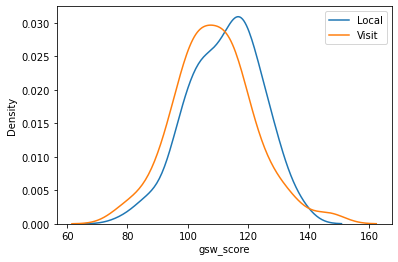

In [26]:
#get distribution plot for both local and visit scores
sns.kdeplot(gsw['gsw_score'][gsw['Local']==1], label = 'Local')
sns.kdeplot(gsw['gsw_score'][gsw['Local']==0], label = 'Visit')
plt.legend()
plt.show()

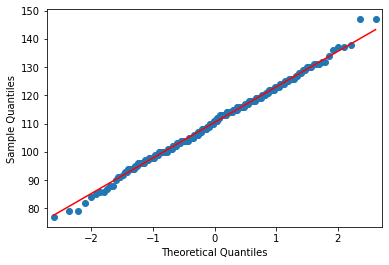

In [27]:
#Visual check to see if the data distribution is normal so we can make inferences
qqplot(gsw['gsw_score'],line='s')
plt.show()

In [28]:
#Statistical check to see if data is normally distributed
stat, p = shapiro(gsw['gsw_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.875
Sample looks Gaussian (fail to reject H0)


In [29]:
#use the normal cdf to calculate areas under the curve and get % over the last 2 seasons
norm.cdf(104,gsw_mean, gsw_std)

0.30410215879819813

In [30]:
#Make function for all other teams 
def team_statter(team, team_abbrev, points):
    team = team_data[(team_data['Team_Abbrev']==team_abbrev)|(team_data['Opponent_Abbrev']==team_abbrev)].loc[:]
    team.reset_index(inplace=True)
    
    #add if the team was local or visit
    for i in range(0, len(team)):
        if team_abbrev in team.loc[i]['game_id']:
            team.loc[i,'Local'] = 1
        else:
            team.loc[i,'Local'] = 0
    
    #Add if the team won or lost that game
    for i in range(0,len(team)):
        if team['Team_Abbrev'][i]==f'{team_abbrev}' and team['Team_Score'].loc[i]>team['Opponent_Score'].loc[i]:
            team.loc[i,'Victory']=1
        if team['Opponent_Abbrev'][i]==f'{team_abbrev}' and team['Team_Score'].loc[i]<team['Opponent_Score'].loc[i]:
            team.loc[i,'Victory']=1
        if team['Team_Abbrev'][i]==f'{team_abbrev}' and team['Team_Score'].loc[i]<team['Opponent_Score'].loc[i]:
            team.loc[i,'Victory']=0
        if team['Opponent_Abbrev'][i]==f'{team_abbrev}' and team['Team_Score'].loc[i]>team['Opponent_Score'].loc[i]:
            team.loc[i,'Victory']=0
    
    #Add team score for calculations
    for i in range(0, len(team)):
        if team['Team_Abbrev'][i]==f'{team_abbrev}':
            team.loc[i,f'{team_abbrev}_score'] = team['Team_Score'].loc[i]
            team.loc[i,'Opp_score'] = team['Opponent_Score'].loc[i]

        elif team['Opponent_Abbrev'][i]==f'{team_abbrev}':
            team.loc[i,f'{team_abbrev}_score'] = team['Opponent_Score'].loc[i]
            team.loc[i,'Opp_score'] = team['Team_Score'].loc[i]
    
    #Add Total Score as well
    team['Total_Score'] = team['Team_Score'] + team['Opponent_Score']

    #Add Both Home and Away team
    for i in range(0, len(team)):
        team.loc[i,'Matchup'] = str(team['Team_Abbrev'].loc[i])+' vs '+str(team['Opponent_Abbrev'].loc[i])

    
    #Several data on the score
    team_mean_local = team[f'{team_abbrev}_score'][team['Local']==1].mean()
    team_std_local = team[f'{team_abbrev}_score'][team['Local']==1].std()
    team_mean_visit = team[f'{team_abbrev}_score'][team['Local']==0].mean()
    team_std_visit = team[f'{team_abbrev}_score'][team['Local']==0].std()
    team_mean = team[f'{team_abbrev}_score'].mean()
    team_std = team[f'{team_abbrev}_score'].std()

    team_pts_list = [team_mean_local,team_std_local,team_mean_visit,team_std_visit,team_mean,team_std]

    #Various data about opponent score
    opp_mean_local = team['Opp_score'][team['Local']==1].mean()
    opp_std_local = team['Opp_score'][team['Local']==1].std()
    opp_mean_visit = team['Opp_score'][team['Local']==0].mean()
    opp_std_visit = team['Opp_score'][team['Local']==0].std()
    Opp_mean = team['Opp_score'].mean()
    Opp_std = team['Opp_score'].std()

    Opp_pts_list = [opp_mean_local,opp_std_local,opp_mean_visit,opp_std_visit,Opp_mean,Opp_std]

    Full_list = team_pts_list + Opp_pts_list

    #Get the distribution plots of the score
    team_pt_dis_local = sns.kdeplot(team[f'{team_abbrev}_score'][team['Local']==1], label = 'Local')
    team_pt_dis_visit = sns.kdeplot(team[f'{team_abbrev}_score'][team['Local']==0], label = 'Visit')
    plt.legend()

    #Normality visual test
    team_nrml_plot = qqplot(team[f'{team_abbrev}_score'],line='s')

    #Normality statistical test
    team_stat, team_p = shapiro(team[f'{team_abbrev}_score'])
    print('Statistics=%.3f, p=%.3f' % (team_stat, team_p))

    #odds of more than X Points
    team_pt_odds = 1-norm.cdf(points,team_mean, team_std)

    #Create DF to store point data on all teams
    team_pts_data = pd.DataFrame(Full_list,index = ['Mean Pts Local','STD Pts Local','Mean Pts Visit','STD Pts Visit','Mean Pts','Std Pts',\
    'Opp_mean_local','Opp_std_local','Opp_mean_visit','Opp_std_visit','Opp_mean','Opp_std'], columns=[f'{team_abbrev}'])

    #Print odds above desired points
    print(f'odds above {points} are {team_pt_odds}')
    
    return team, team_pt_odds, team_pts_data

Statistics=0.995, p=0.652
odds above 120 are 0.3164021426365393


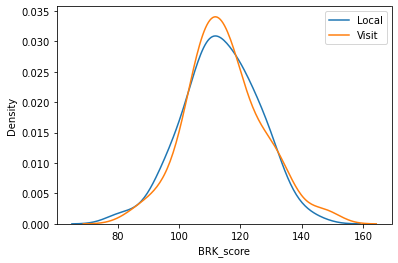

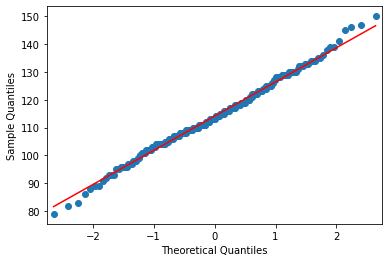

In [31]:
#Example of the data we could be getting
nets, nets_odds, brk_pts_data = team_statter('nets', 'BRK', 120)

In [32]:
#Check out our newly made df
display(nets.head(), print(f'odds above 112 are {round(nets_odds,2)}'), brk_pts_data.transpose())

odds above 112 are 0.32


,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local,Victory,BRK_score,Opp_score
0,0,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,260,IND vs BRK,1.0,1.0,134.0,126.0
1,36,202202140BRK,2022-02-14,0,A,SAC,85,100.7,0.394,15.5,20.4,0.156,84.4,"Terence Davis, Jeremy Lamb",BRK,109,100.7,0.565,15.0,15.8,0.167,108.2,194,SAC vs BRK,1.0,1.0,109.0,85.0
2,83,202202020SAC,2022-02-02,0,H,SAC,112,92.3,0.516,9.8,33.3,0.172,121.4,"Marvin Bagley III, Terence Davis, ""DeAaron Fox""",BRK,101,92.3,0.536,12.6,23.3,0.131,109.5,213,SAC vs BRK,0.0,0.0,101.0,112.0
3,168,202112270LAC,2021-12-27,0,H,LAC,108,99.5,0.454,9.2,29.8,0.206,108.6,"Nicolas Batum, Paul George, Isaiah Hartenstein...",BRK,124,99.5,0.642,12.0,20.0,0.125,124.7,232,LAC vs BRK,0.0,1.0,124.0,108.0
4,171,202201010BRK,2022-01-01,0,A,LAC,120,101.2,0.570,9.1,14.9,0.256,118.6,"Nicolas Batum, Brandon Boston Jr., Paul George...",BRK,116,101.2,0.490,11.5,34.0,0.216,114.6,236,LAC vs BRK,1.0,0.0,116.0,120.0


None

,Mean Pts Local,STD Pts Local,Mean Pts Visit,STD Pts Visit,Mean Pts,Std Pts,Opp_mean_local,Opp_std_local,Opp_mean_visit,Opp_std_visit,Opp_mean,Opp_std
BRK,113.532787,12.217847,114.708333,12.437674,114.115702,12.315823,111.434426,12.413661,114.0,11.993696,112.706612,12.24951


Statistics=0.994, p=0.355
odds above 120 are 0.40389441596105025


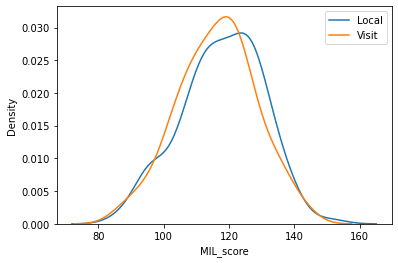

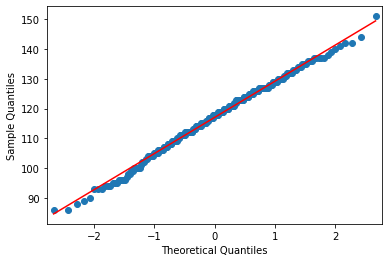

In [33]:
#repeat for another team
bucks, bucks_odds, mil_pts_data = team_statter('bucks','MIL',120)

In [34]:
#Check to see if info is correct again
display(bucks.head(), bucks_odds, mil_pts_data)

,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local,Victory,MIL_score,Opp_score
0,2,202204100CLE,2022-04-10,0,A,MIL,115,101.9,0.511,10.5,17.4,0.284,112.9,"Grayson Allen, Giannis Antetokounmpo, George H...",CLE,133,101.9,0.644,9.0,23.3,0.128,130.5,248,MIL vs CLE,0.0,0.0,115.0,133.0
1,25,202203160SAC,2022-03-16,0,H,SAC,126,106.7,0.574,12.7,15.2,0.191,118.1,"Terence Davis, Jeremy Lamb, Neemias Queta",MIL,135,106.7,0.629,9.6,20.0,0.258,126.5,261,SAC vs MIL,0.0,1.0,135.0,126.0
2,78,202201220MIL,2022-01-22,0,A,SAC,127,100.9,0.603,11.9,27.7,0.103,125.9,"De'Aaron Fox, Louis King, Robert Woodard II",MIL,133,100.9,0.610,6.4,20.5,0.242,131.9,260,SAC vs MIL,1.0,1.0,133.0,127.0
3,125,202204010MIL,2022-04-01,0,A,LAC,153,101.3,0.734,8.1,24.2,0.196,151.1,"Brandon Boston Jr., Paul George, Kawhi Leonard...",MIL,119,101.3,0.574,12.8,31.7,0.117,117.5,272,LAC vs MIL,1.0,0.0,119.0,153.0
4,146,202202060LAC,2022-02-06,0,H,LAC,113,101.3,0.510,8.8,18.9,0.156,111.6,"Paul George, Kawhi Leonard, Jason Preston, Jay...",MIL,137,101.3,0.653,9.1,17.1,0.250,135.3,250,LAC vs MIL,0.0,1.0,137.0,113.0


0.40389441596105025

,MIL
Mean Pts Local,117.860465
STD Pts Local,12.379257
Mean Pts Visit,116.229008
STD Pts Visit,11.959267
Mean Pts,117.038462
Std Pts,12.173396
Opp_mean_local,109.720930
Opp_std_local,12.658975
Opp_mean_visit,112.297710
Opp_std_visit,12.600180


In [35]:
#All the dfs with team data can be joined into one for other operations
test_plot = mil_pts_data.join(brk_pts_data).join(gsw_pts_data).transpose()

In [36]:
#display the test for  plot
test_plot

,Mean Pts Local,STD Pts Local,Mean Pts Visit,STD Pts Visit,Mean Pts,Std Pts,Opp_mean_local,Opp_std_local,Opp_mean_visit,Opp_std_visit,Opp_mean,Opp_std
MIL,117.860465,12.379257,116.229008,11.959267,117.038462,12.173396,109.720930,12.658975,112.29771,12.600180,111.019231,12.670902
BRK,113.532787,12.217847,114.708333,12.437674,114.115702,12.315823,111.434426,12.413661,114.00000,11.993696,112.706612,12.249510
GSW,112.250000,11.887233,108.633028,13.120990,110.466063,12.613304,NaN,NaN,NaN,NaN,110.665158,12.407333


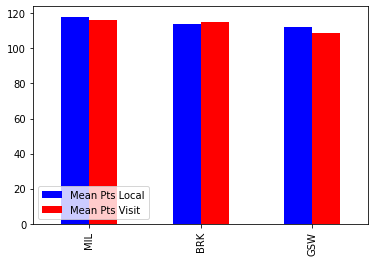

In [37]:
#Use the test plot to pump some graphs
test_plot[['Mean Pts Local', 'Mean Pts Visit']].plot(kind = 'bar', color = ['blue','red'])
plt.legend(loc = 'lower left')
plt.show()

Statistics=0.988, p=0.033
odds above 104 are 0.6900884671129179


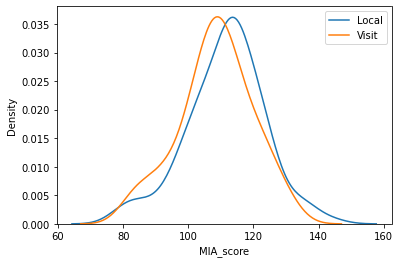

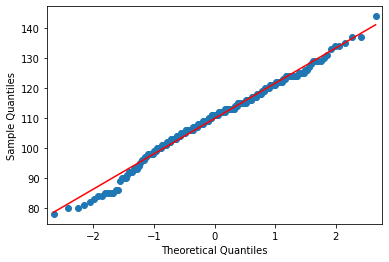

In [38]:
#Get some more relevant team data
heat, heat_odds, heat_pts_data = team_statter('heat', 'MIA', 104)

In [39]:
heat_pts_data

,MIA
Mean Pts Local,111.368000
STD Pts Local,12.018491
Mean Pts Visit,108.370079
STD Pts Visit,11.446773
Mean Pts,109.857143
Std Pts,11.806349
Opp_mean_local,107.032000
Opp_std_local,11.135482
Opp_mean_visit,108.370079
Opp_std_visit,11.386293


Statistics=0.990, p=0.101
odds above 114 are 0.4511240377903555


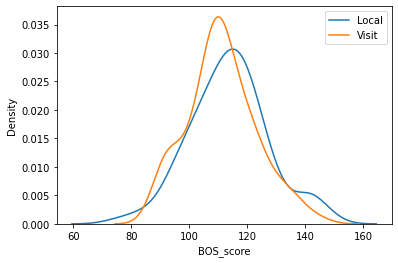

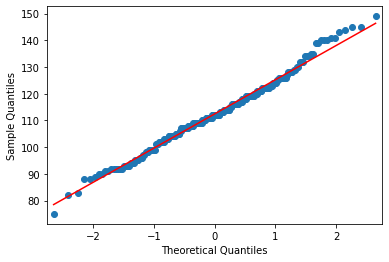

In [40]:
celtics, celtics_odds, celtics_pts_data = team_statter('celtics', 'BOS', 114)

In [41]:
celtics.head()

,index,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup,Local,Victory,BOS_score,Opp_score
0,7,202204100MEM,2022-04-10,0,A,BOS,139,102.1,0.636,12.5,35.0,0.131,136.2,"Juwan Morgan, Nik Stauskas, Robert Williams",MEM,110,102.1,0.456,8.1,31.1,0.167,107.8,249,BOS vs MEM,0.0,1.0,139.0,110.0
1,24,202203180SAC,2022-03-18,0,H,SAC,97,95.5,0.500,15.2,17.8,0.228,101.5,"Terence Davis, De'Aaron Fox, Richaun Holmes, J...",BOS,126,95.5,0.695,12.7,17.1,0.146,131.9,223,SAC vs BOS,0.0,1.0,126.0,97.0
2,79,202201250BOS,2022-01-25,0,A,SAC,75,95.7,0.337,9.0,23.1,0.116,78.4,"De'Aaron Fox, Chimezie Metu",BOS,128,95.7,0.592,9.4,36.2,0.058,133.8,203,SAC vs BOS,1.0,1.0,128.0,75.0
3,123,202112080LAC,2021-12-08,0,H,LAC,114,102.1,0.553,17.4,21.4,0.235,111.7,"Amir Coffey, Keon Johnson, Kawhi Leonard, Jaso...",BOS,111,102.1,0.535,18.8,32.6,0.221,108.7,225,LAC vs BOS,0.0,0.0,111.0,114.0
4,169,202112290BOS,2021-12-29,0,A,LAC,91,89.4,0.475,13.7,23.7,0.173,101.8,"Nicolas Batum, Brandon Boston Jr., Paul George...",BOS,82,89.4,0.366,7.0,34.4,0.079,91.8,173,LAC vs BOS,1.0,0.0,82.0,91.0


Statistics=0.993, p=0.265
odds above 114 are 0.41466149563489485


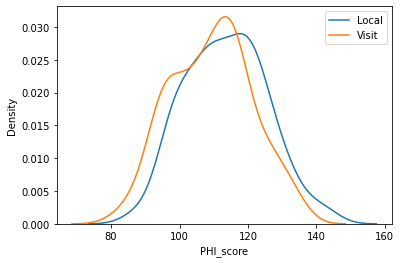

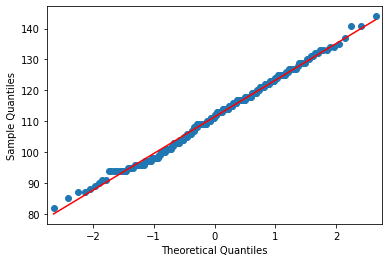

In [42]:
philly, philly_odds, philly_pts_data = team_statter('philly', 'PHI', 114)

In [43]:
philly_odds

0.41466149563489485

In [44]:
philly_pts_data

,PHI
Mean Pts Local,113.570248
STD Pts Local,11.762813
Mean Pts Visit,109.311475
STD Pts Visit,11.724864
Mean Pts,111.432099
Std Pts,11.912149
Opp_mean_local,106.933884
Opp_std_local,10.733697
Opp_mean_visit,109.065574
Opp_std_visit,11.081768


Statistics=0.990, p=0.099
odds above 103 are 0.5723245237135094


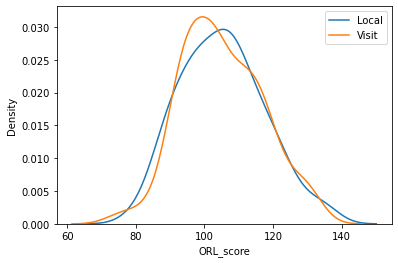

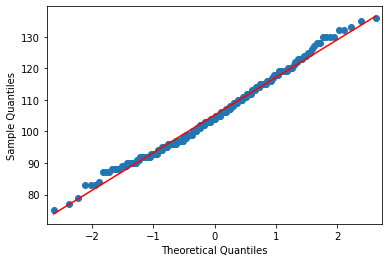

In [45]:
magics, magics_odds, magics_pts_data = team_statter('Magics', 'ORL', 103)

In [46]:
magics_pts_data

,ORL
Mean Pts Local,105.201754
STD Pts Local,12.148185
Mean Pts Visit,105.152542
STD Pts Visit,11.788468
Mean Pts,105.176724
Std Pts,11.940646
Opp_mean_local,111.324561
Opp_std_local,13.529055
Opp_mean_visit,111.491525
Opp_std_visit,10.696070


In [47]:
#Matchup stat searcher for point information.
team_data['Total_Score'][(team_data['Team_Abbrev']=='LAL')|(team_data['Team_Abbrev']=='DEN')&(team_data['Opponent_Abbrev']=='LAL')\
                         |(team_data['Opponent_Abbrev']=='DEN')].describe()

count    381.000000
mean     220.388451
std       19.911284
min      158.000000
25%      207.000000
50%      220.000000
75%      233.000000
max      287.000000
Name: Total_Score, dtype: float64

In [48]:
print(team_data['Total_Score'].median(), team_data['Team_Score'].std())

222.0 12.611507815022465


In [49]:
#Get all team appearances on a determined point range that we want

more_than = range(230,260)

all_games = pd.DataFrame(index = set(team_data['Team_Abbrev']))

for i in more_than:
    Team_Abbrev_count = team_data['Team_Abbrev'][team_data['Total_Score']==i].value_counts().to_frame()
    
    Opponent_Abbrev_count = team_data['Opponent_Abbrev'][team_data['Total_Score']==i].value_counts().to_frame()

    lots_points_games = Team_Abbrev_count.join(Opponent_Abbrev_count)

    lots_points_games = lots_points_games.replace(np.nan, 0)

    lots_points_games['Total_Appearances'] = lots_points_games['Team_Abbrev'] + lots_points_games['Opponent_Abbrev']

    all_games.sort_index(inplace = True)
    
    all_games = pd.concat([all_games, lots_points_games])

all_games.groupby(all_games.index)['Total_Appearances'].sum().to_frame().sort_values(by = 'Total_Appearances', ascending = False)


,Total_Appearances
MIL,99.0
MEM,84.0
NOP,84.0
MIN,81.0
BRK,79.0
SAC,77.0
IND,76.0
LAL,76.0
SAS,75.0
LAC,74.0


In [50]:
#Get all Matchups on a determined point range that we want

more_than = range(230,260)

all_games = pd.DataFrame(index = set(team_data['Matchup']))

for i in more_than:
    
    lots_points_games = team_data['Matchup'][team_data['Total_Score']==i].value_counts().to_frame()

    lots_points_games = lots_points_games.replace(np.nan, 0)

    lots_points_games.sort_index(inplace = True)

    all_games.sort_index(inplace = True)
    
    all_games = pd.concat([all_games, lots_points_games])

all_games.groupby(all_games.index)['Matchup'].sum().to_frame().sort_values(by = 'Matchup', ascending = False).head(20)

,Matchup
MEM vs UTA,9.0
BRK vs BOS,8.0
SAC vs HOU,8.0
BRK vs MIL,8.0
SAC vs POR,7.0
MIA vs MIL,7.0
NOP vs HOU,7.0
MIL vs BOS,6.0
GSW vs MIN,6.0
DEN vs POR,6.0


In [51]:
#Checking if the grouping/counting was well performed
team_data[team_data['Matchup']=='SAC vs POR']

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,Total_Score,Matchup
42,202110200POR,2021-10-20,0,A,SAC,124,104.6,0.549,8.7,14.9,0.250,118.6,"Louis King, Neemias Queta, Jahmi'us Ramsey",POR,121,104.6,0.548,10.5,20.0,0.204,115.7,245,SAC vs POR
60,202111240SAC,2021-11-24,0,H,SAC,125,100.0,0.593,12.2,31.8,0.267,124.9,"Richaun Holmes, Neemias Queta, Jahmi'us Ramsey...",POR,121,100.0,0.532,11.0,31.0,0.223,121.0,246,SAC vs POR
72,202201090POR,2022-01-09,0,A,SAC,88,97.2,0.429,11.3,17.4,0.176,90.6,"Richaun Holmes, Damian Jones, Louis King, Neem...",POR,103,97.2,0.517,14.5,20.8,0.136,106.0,191,SAC vs POR
2313,202101090SAC,2021-01-09,0,H,SAC,99,104.9,0.457,13.5,12.8,0.309,94.3,"Kyle Guy, DaQuan Jeffries, Jabari Parker",POR,125,104.9,0.525,6.8,18.0,0.200,119.1,224,SAC vs POR
2314,202101130SAC,2021-01-13,0,H,SAC,126,96.6,0.637,12.0,23.5,0.226,130.4,"Kyle Guy, DaQuan Jeffries",POR,132,96.6,0.617,7.3,26.1,0.233,136.6,258,SAC vs POR
2316,202103040POR,2021-03-04,0,A,SAC,119,95.5,0.529,6.0,36.0,0.097,124.6,"Tyrese Haliburton, Chimezie Metu, Jahmi'us Ram...",POR,123,95.5,0.563,7.5,21.4,0.273,128.8,242,SAC vs POR
3469,201910250SAC,2019-10-25,0,H,SAC,112,102.1,0.511,14.7,27.1,0.264,109.7,"Marvin Bagley, Harry Giles, Kyle Guy, DaQuan J...",POR,122,102.1,0.606,14.5,14.3,0.224,119.5,234,SAC vs POR
3472,201911120SAC,2019-11-12,0,H,SAC,107,97.9,0.506,12.6,25.0,0.233,109.2,"Marvin Bagley, De'Aaron Fox, Kyle Guy, DaQuan ...",POR,99,97.9,0.494,15.9,16.7,0.299,101.1,206,SAC vs POR
3475,201912040POR,2019-12-04,0,A,SAC,116,99.0,0.521,8.7,26.0,0.179,117.2,"Marvin Bagley, Bogdan Bogdanovic, De'Aaron Fox...",POR,127,99.0,0.655,11.4,16.2,0.202,128.3,243,SAC vs POR
3486,202003070POR,2020-03-07,0,A,SAC,123,97.7,0.606,12.8,26.2,0.235,125.9,"Marvin Bagley, Kyle Guy, DaQuan Jeffries",POR,111,97.7,0.528,9.9,21.7,0.191,113.6,234,SAC vs POR


In [58]:
#Statistics on all Matchup's Scores
team_data['Total_Score'][(team_data['Matchup']=='NYK vs MEM')|(team_data['Matchup']=='MEM vs NYK')].describe()

count      5.000000
mean     235.400000
std       15.485477
min      222.000000
25%      228.000000
50%      232.000000
75%      233.000000
max      262.000000
Name: Total_Score, dtype: float64